# Movie Recommendation System

ML models to be used
<ul>
<li>Collaborative fltering: KNN</li> (DONE)
<li>Matrix Factorization</li> (IN PROCESS)
<li>Genres Model: Neural Network/Deep Learning (Google Colab)</li> (Understanding)
<li>Combined Model: Linear Regression</li>
</ul>


## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [92]:
movies=pd.read_csv("IMDB-Dataset/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [93]:
ratings=pd.read_csv("IMDB-Dataset/ratings.csv")
ratings.drop('timestamp',axis='columns', inplace=True)
ratings.head()

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0


### Understanding Data

In [ ]:
print(movies.shape,ratings.shape)

In [94]:
ratings['rating'].describe()

count    105339.000000
mean          3.516850
std           1.044872
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [95]:
merged=pd.merge(movies,ratings,on='movieId')
merged.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0


In [96]:
#merged.shape
merged.describe()

,movieId,userId,rating
count,105339.000000,105339.000000,105339.000000
mean,13381.312477,364.924539,3.516850
std,26170.456869,197.486905,1.044872
min,1.000000,1.000000,0.500000
25%,1073.000000,192.000000,3.000000
50%,2497.000000,383.000000,3.500000
75%,5991.000000,557.000000,4.000000
max,149532.000000,668.000000,5.000000


In [200]:
merged.nunique()

movieId    10325
title      10323
genres       938
userId       668
rating        10
dtype: int64

## Data Manipulation

In [97]:
#avg rating for each movie
ar=merged
ar=ar.groupby('title')['rating'].mean()

In [98]:
ar.head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

In [99]:
#optional
sorted_ratings=ar.sort_values(ascending=False)
sorted_ratings.tail()

title
Day Night Day Night (2006)                           0.5
The Aztec Mummy Against the Humanoid Robot (1958)    0.5
Angels in America (2003)                             0.5
Blood of a Poet, The (Sang d'un poète, Le) (1930)    0.5
It's Pat (1994)                                      0.5
Name: rating, dtype: float64

In [100]:
# total number of ratings for each movie
tn=merged.groupby('title')["rating"].count()
tn.head()

title
'71 (2014)                                  1
'Hellboy': The Seeds of Creation (2004)     1
'Round Midnight (1986)                      1
'Til There Was You (1997)                   3
'burbs, The (1989)                         20
Name: rating, dtype: int64

In [130]:
# new temp dataframe

data=pd.DataFrame()
data['average_ratings']=ar
data['count_of_total_ratings']=tn
data=pd.merge(data,movies,on='title')
#data.drop_duplicates()

In [110]:
print(movies.shape)
print(data.shape, type(data))
data.head()

(10329, 3)
(10325, 5) <class 'pandas.core.frame.DataFrame'>


,title,average_ratings,count_of_total_ratings,movieId,genres
0,'71 (2014),3.500,1,117867,Action|Drama|Thriller|War
1,'Hellboy': The Seeds of Creation (2004),3.000,1,97757,Action|Adventure|Comedy|Documentary|Fantasy
2,'Round Midnight (1986),2.500,1,26564,Drama|Musical
3,'Til There Was You (1997),4.000,3,779,Drama|Romance
4,"'burbs, The (1989)",3.125,20,2072,Comedy


## Data Visualization

In [201]:
import seaborn as sns
sns.set_style('white')
%matplotlib inline

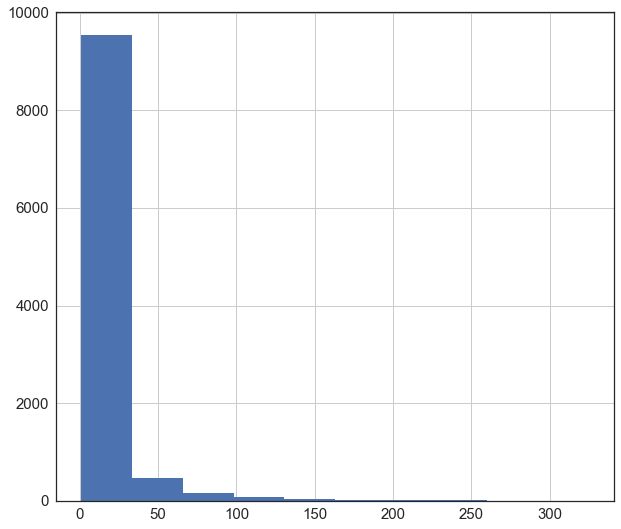

In [202]:
plt.figure(figsize=(10,9))
data['count_of_total_ratings'].hist(bins=10)

From the output we can see that the most of the movies have recived less than 50 ratings. While the number of movies having more than 100 ratings is very low

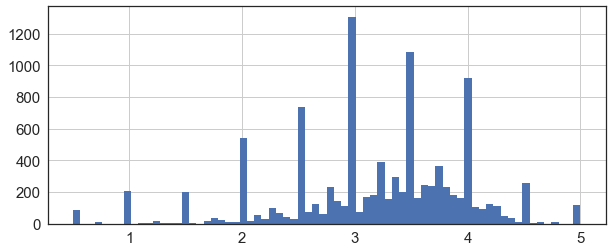

In [205]:
plt.figure(figsize=(10,4))
data['average_ratings'].hist(bins=70)

We can see that the integer values have taller bars than the floating values since most of the users assign rating as integer value 1,2,3,4 or 5. Furthermore, its evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data.

Earlier, we said that movies with a higher number of rating usually have a high avarage rating as well since a good movie is normally wll-known and a well-known movie is watched by a large number of people, and thus has a higher rating.

C:\Users\User\.anaconda\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\User\.anaconda\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 576x432 with 0 Axes>

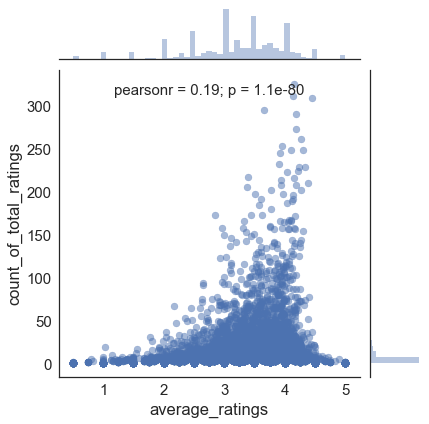

In [206]:
plt.figure(figsize=(8,6))
sns.jointplot(x='average_ratings', y='count_of_total_ratings',data=data, alpha=0.5)

The graph shows that,in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

# Building Recommandation System

## KNN

### One Hot encoding on genres

As the 'ganres' is a categorical feauture it needs to be binarized so we can use it.

In [131]:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
genre_labels=list(genre_labels)

In [132]:
def binary(movieGenre):
    binaryList = []
    
    for genre in genre_labels:
        if genre in movieGenre:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [133]:
data['genres_bin'] = data['genres'].apply(lambda x: binary(x))
data['genres_bin'].head()

0    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [114]:
print(data.shape, type(data))
data.head()

(10325, 6) <class 'pandas.core.frame.DataFrame'>


,title,average_ratings,count_of_total_ratings,movieId,genres,genres_bin
0,'71 (2014),3.500,1,117867,Action|Drama|Thriller|War,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,'Hellboy': The Seeds of Creation (2004),3.000,1,97757,Action|Adventure|Comedy|Documentary|Fantasy,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ..."
2,'Round Midnight (1986),2.500,1,26564,Drama|Musical,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,'Til There Was You (1997),4.000,3,779,Drama|Romance,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"'burbs, The (1989)",3.125,20,2072,Comedy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Using cosine similarity method based on ganers. The smaller the angle, higher the cosine similarity, the much 1st movie is likely to be similar with the 2nd

In [115]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = data.iloc[movieId1]
    b = data.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    return genreDistance

In [31]:
Similarity(3,1600)

0.6666666666666666

I won't use 'count_of_total_ratings' column here, even though thresholding it by taking only the movies with more then 50 reviews sounds promising. :D (gonna try after deadline)

In [136]:
new_id = list(range(0,data.shape[0]))
dataK=data[['title','genres','average_ratings','genres_bin']]
dataK['new_id']=new_id
dataK.head()

C:\Users\User\.anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,genres,average_ratings,genres_bin,new_id
0,'71 (2014),Action|Drama|Thriller|War,3.500,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,3.000,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...",1
2,'Round Midnight (1986),Drama|Musical,2.500,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,'Til There Was You (1997),Drama|Romance,4.000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
4,"'burbs, The (1989)",Comedy,3.125,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4


As it takes 26 seconds for each movie to find neighbors and do the rating prediction i decided to take 2% of our dataset, i.e 206 raws 

In [181]:
# Randomly sample 2% of the ratings dataset
small_data = dataK.sample(frac=0.02)

In [183]:
small_data.shape

,title,genres,average_ratings,genres_bin,new_id
5611,Lucky Number Slevin (2006),Crime|Drama|Mystery,3.892857,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5611
2402,Death Note (2006),Adventure|Crime|Drama|Horror|Mystery,4.000000,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...",2402
9267,"Tillman Story, The (2010)",Documentary,4.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",9267
469,Anastasia (1997),Adventure|Animation|Children|Drama|Musical,3.590909,"[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...",469
1784,Cherry 2000 (1987),Romance|Sci-Fi,2.500000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",1784


### For Prediction

In [150]:
# find K Neighbors
import operator
def getNeighbors(baseMovie, K):
    distances = []

    for index, movie in dataK.iterrows():
        if movie['new_id'] != baseMovie['new_id'].values[0]:
            dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
            distances.append((movie['new_id'], dist))

    distances.sort(key=operator.itemgetter(1))
    neighbors = []

    for x in range(K):
        neighbors.append(distances[x])
    return neighbors

In [164]:
# predict what avg rating can have movie based on it's Neighbors' avg ratings
def predict_ratings(df):
    predictions=pd.Series()
    for movie_id in df['new_id']:
        new_movie = df[df['new_id']==movie_id].iloc[0].to_frame().T

        K = 10
        avgRating = 0
        neighbors = getNeighbors(new_movie, K)

        for neighbor in neighbors:
            avgRating = avgRating+dataK.iloc[neighbor[0]][2]  
            
        avgRating = avgRating/K
        predictions.set_value(movie_id,avgRating)
    return predictions


In [185]:
import time
t0 = time.time()
predictionK=predict_ratings(small_data)
print(time.time() - t0)

C:\Users\User\.anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


5424.821137905121


In [192]:
a=list(predictionK)

In [197]:
# save predictions in numpy array
np.save('predictionK.npy', np.asarray(a))
np.savetxt("predictionK.txt", np.asarray(a))

### Evaluation

In [173]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(pred, actual):
    return sqrt(mean_squared_error(pred, actual))

In [199]:
rmseK=rmse(predictionK,small_data.average_ratings)
print('The RMSE for predictions with KNN:   ',rmseK)

The RMSE for predictions with KNN:    0.851724055552432


In [137]:
# same prediction but for a single movie
def predict_score(movie_id):
    new_movie = dataK[dataK['new_id']==movie_id].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.title.values[0])

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+dataK.iloc[neighbor[0]][2]  
        print( dataK.iloc[neighbor[0]][0]+" | Genres: "+str(dataK.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(dataK.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['title'].values[0],new_movie['average_ratings']))

In [138]:
predict_score(5567)

Selected Movie:  Love Exposure (Ai No Mukidashi) (2008)

Recommended Movies: 

Casanova (2005) | Genres: Action|Adventure|Comedy|Drama|Romance | Rating: 3.2
(500) Days of Summer (2009) | Genres: Comedy|Drama|Romance | Rating: 3.9324324324324325
10 Items or Less (2006) | Genres: Comedy|Drama|Romance | Rating: 3.8333333333333335
101 Reykjavik (101 Reykjavík) (2000) | Genres: Comedy|Drama|Romance | Rating: 2.0
2 Days in Paris (2007) | Genres: Comedy|Drama|Romance | Rating: 3.5
3 Idiots (2009) | Genres: Comedy|Drama|Romance | Rating: 4.666666666666667
About Last Night... (1986) | Genres: Comedy|Drama|Romance | Rating: 2.9
About a Boy (2002) | Genres: Comedy|Drama|Romance | Rating: 3.625
Accidental Tourist, The (1988) | Genres: Comedy|Drama|Romance | Rating: 2.8333333333333335
Adaptation (2002) | Genres: Comedy|Drama|Romance | Rating: 3.9761904761904763


The predicted rating for Love Exposure (Ai No Mukidashi) (2008) is: 3.446696
The actual rating for Love Exposure (Ai No Mukidashi) (2008)